**Task 3: The Data exploratory analysis process (EDA)**

Overview: Orion Rainier, a Data Scientist at TikTok, is pleased with the work you have already completed and is requesting your assistance with some Exploratory Data Analysis (EDA) and data visualization. The management team requires:

    - a Python notebook showing data structuring and cleaning with EDA insights visualizations
    
    - create a Tableau dashboard showing a simple claims versus opinions count, as well as stacked bar charts of claims versus opinions for variables like video view counts, video like counts, video share counts, and video download counts. 


In [3]:
#import data libraries and load dataset (tiktok_dataset.csv)
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

TikTok_df = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Desktop\Data analytics\Portfolio\Full_cycle projects\TikTok classification machine learning\Dataset\tiktok_dataset.csv")

pd.set_option('display.max.row', 140)
pd.set_option('display.max.columns', 30)
TikTok_df

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19377,19378,NaN,7578226840,21,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19378,19379,NaN,6079236179,53,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19379,19380,NaN,2565539685,10,NaN,verified,under review,NaN,NaN,NaN,NaN,NaN
19380,19381,NaN,2969178540,24,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN


**General data inspection**

In [4]:
#See number of rows and columns 
TikTok_df.shape

(19382, 12)

In [5]:
#See columns datatype
TikTok_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [6]:
#Identify any rows with null values 
TikTok_df[TikTok_df.isnull().any(axis=1)]

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
19084,19085,NaN,4380513697,39,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19085,19086,NaN,8352130892,60,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19086,19087,NaN,4443076562,25,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19087,19088,NaN,8328300333,7,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19088,19089,NaN,3968729520,8,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
19377,19378,NaN,7578226840,21,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19378,19379,NaN,6079236179,53,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19379,19380,NaN,2565539685,10,NaN,verified,under review,NaN,NaN,NaN,NaN,NaN
19380,19381,NaN,2969178540,24,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN


In [7]:
#Drop 298 rows with null values 
TikTok_df.dropna(axis=0, inplace= True)
TikTok_df.shape

(19084, 12)

In [8]:
#Drop any duplicated rows 
'''
The dataset doesnt contain any duplicated rows
'''
TikTok_df.drop_duplicates(keep = False, inplace = True)
TikTok_df.shape

(19084, 12)

In [9]:
#Descriptive statistics for numeric columns 
TikTok_df.select_dtypes(include= ['number']).describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19084.000000,1.908400e+04,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9542.500000,5.624840e+09,32.423811,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5509.220604,2.537030e+09,16.226470,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4771.750000,3.425100e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9542.500000,5.609500e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14313.250000,7.840823e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19084.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


**EDA process**

**Insight 1: How many values for claim and opinion in claim_status column**

In [10]:
# Insight 1: How many values for claim and opinion in claim_status column 
'''
The dataset contains 9608 values for claim and 9476 values for opinion
'''

TikTok_df.groupby('claim_status')['video_id'].size().reset_index()

,claim_status,video_id
0,claim,9608
1,opinion,9476


**Insight 2: What are the median view, like, share, download, comment count for opion and claim related videos**

In [11]:
#group data and compute median
metric_data = TikTok_df.groupby('claim_status')[['video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count']].median().reset_index()
metric_data

,claim_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,claim,501555.0,123649.0,17997.5,1139.5,286.0
1,opinion,4953.0,823.0,121.0,7.0,1.0


In [12]:
#Reshape data to long format
melted_vs = metric_data.melt(id_vars='claim_status', var_name= 'metric', value_name='count')
melted_vs

,claim_status,metric,count
0,claim,video_view_count,501555.0
1,opinion,video_view_count,4953.0
2,claim,video_like_count,123649.0
3,opinion,video_like_count,823.0
4,claim,video_share_count,17997.5
5,opinion,video_share_count,121.0
6,claim,video_download_count,1139.5
7,opinion,video_download_count,7.0
8,claim,video_comment_count,286.0
9,opinion,video_comment_count,1.0


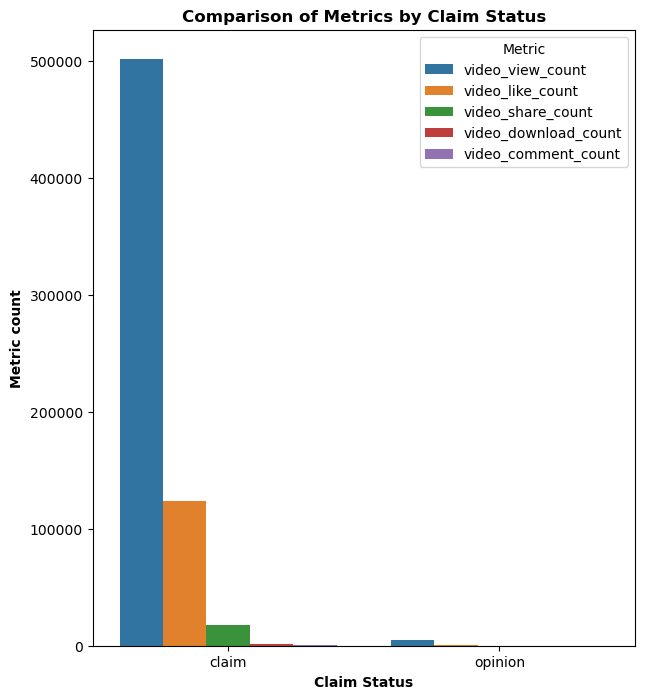

In [13]:
#Bar graph 
plt.figure(figsize = (7,8))
sns.barplot(data= melted_vs, x= 'claim_status', y= 'count', hue= 'metric' )
plt.title('Comparison of Metrics by Claim Status', weight='bold')
plt.xlabel('Claim Status', weight='bold')
plt.ylabel('Metric count', weight='bold')
plt.legend(title='Metric')

Text(0.5, 0.5, 'The graph shows that claim related videos\n have significant number of views, likes, \nshares, downloads, and comments\n than opinion related videos')

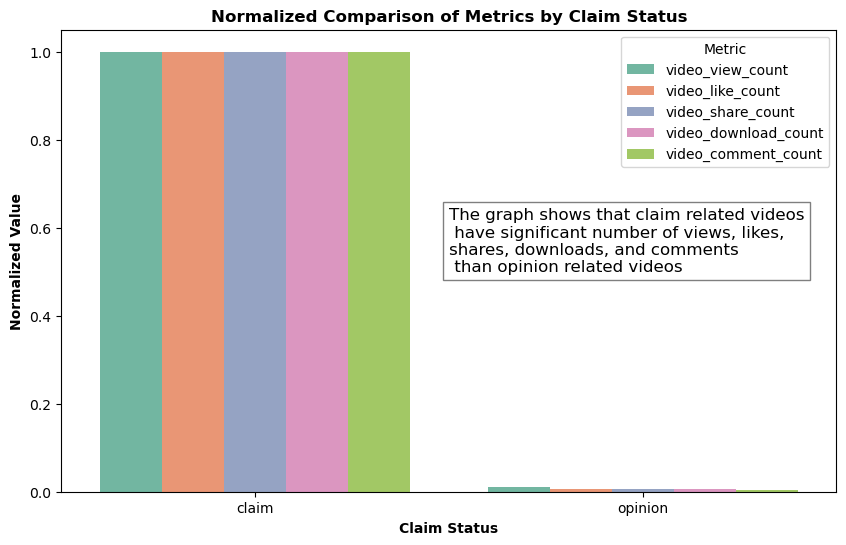

In [14]:
# Normalize the metric_data for better visualization
metric_norm = metric_data.copy()
metrics = ['video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count']
for metric in metrics:
    metric_norm[metric] = metric_norm[metric] / metric_norm[metric].max()

# Melt the normalized DataFrame
melted_vs_norm = metric_norm.melt(id_vars='claim_status', var_name='metric', value_name='value')

# Plotting the normalized bar graph
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_vs_norm, x='claim_status', y='value', hue='metric', palette='Set2')
plt.title('Normalized Comparison of Metrics by Claim Status', weight='bold')
plt.xlabel('Claim Status', weight='bold')
plt.ylabel('Normalized Value', weight='bold')
plt.legend(title='Metric')

#Add desciption text 
plt.text(0.5, 0.5, 'The graph shows that claim related videos\n have significant number of views, likes, \nshares, downloads, and comments\n than opinion related videos', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

**Insight 3: Number of videos by claim_status and author ban status**

In [15]:
#group data
video_count_bar = TikTok_df.groupby(['claim_status', 'author_ban_status'])['video_id'].count().reset_index()
video_count_bar

,claim_status,author_ban_status,video_id
0,claim,active,6566
1,claim,banned,1439
2,claim,under review,1603
3,opinion,active,8817
4,opinion,banned,196
5,opinion,under review,463


Text(2.7, 6560, 'Observations: There are more claim related videos authors are being\n under review or banned than opinion videos authors.\nSurprisingly, there are more opinion related videos authors \n are active than the claim category.')

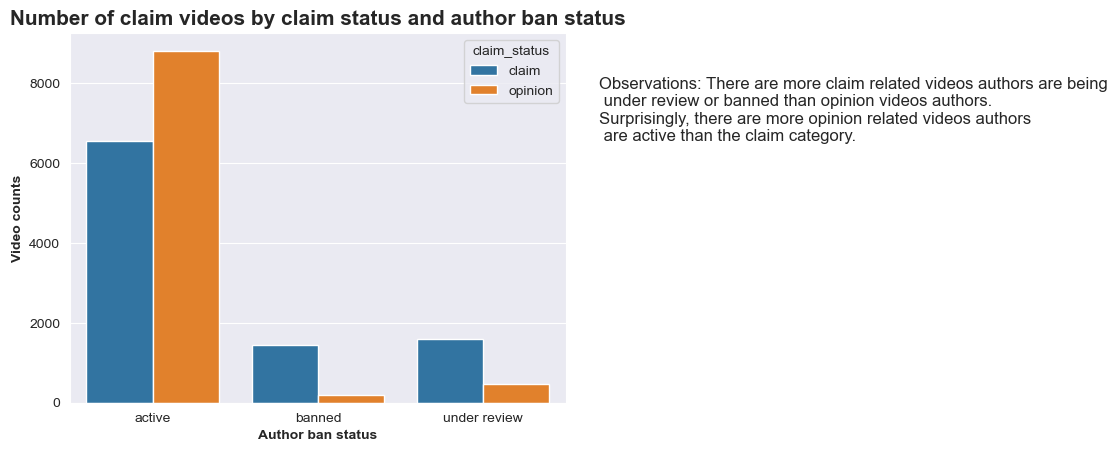

In [16]:
#Visualization for insight 3
sns.set_style('darkgrid')
sns.barplot (data= video_count_bar, x = 'author_ban_status', y= 'video_id', hue= 'claim_status')

plt.title('Number of claim videos by claim status and author ban status', weight='bold', fontsize = 15)
plt.xlabel('Author ban status', weight= 'bold')
plt.ylabel('Video counts', weight = 'bold')

#Add description text
plt.text(2.7, 6560, 'Observations: There are more claim related videos authors are being\n under review or banned than opinion videos authors.\nSurprisingly, there are more opinion related videos authors \n are active than the claim category.', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

**Insight 4: Median view count by author ban status**

In [17]:
#Group data
view_count_status = TikTok_df.groupby('author_ban_status')['video_view_count'].median().reset_index().sort_values(by = 'video_view_count', ascending = False)
view_count_status

,author_ban_status,video_view_count
1,banned,448201.0
2,under review,365245.5
0,active,8616.0


Text(500000, 0, 'Observation: Among the author ban status, banned authors \nhave the highest median view (appoximatley 450k), followed\nby authors are being under review and are active,\n around 365k and 8.6k respectively ')

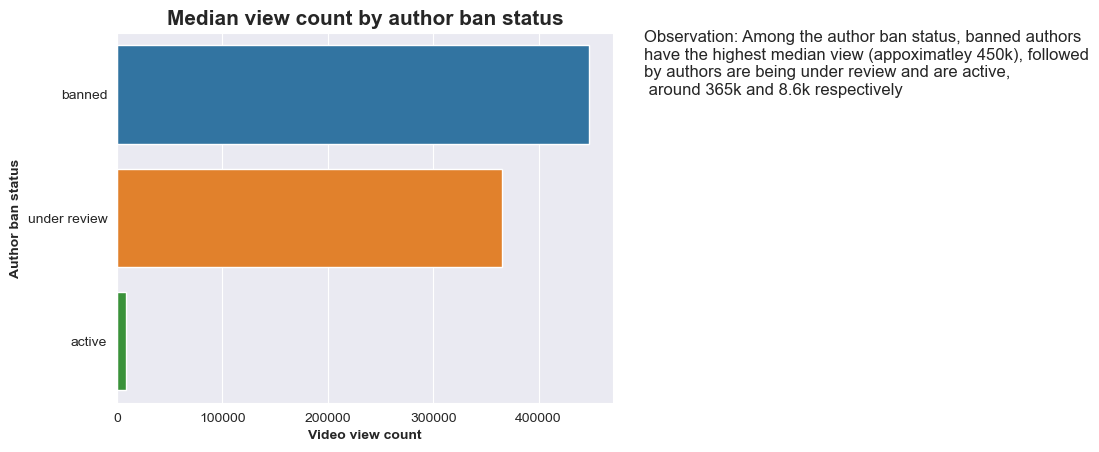

In [18]:
#Bar graph visualization 
sns.barplot(data= view_count_status, x= 'video_view_count', y='author_ban_status')

plt.title('Median view count by author ban status', weight='bold', fontsize = 15)
plt.xlabel('Video view count', weight= 'bold')
plt.ylabel('Author ban status', weight = 'bold')

#Add description text
plt.text(500000, 0, 'Observation: Among the author ban status, banned authors \nhave the highest median view (appoximatley 450k), followed\nby authors are being under review and are active,\n around 365k and 8.6k respectively ', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

**Insight 5: median video share count for each author ban status**

In [19]:
#Group data 
share_pie = TikTok_df.groupby('author_ban_status')['video_share_count'].median().reset_index()
share_pie

,author_ban_status,video_share_count
0,active,437.0
1,banned,14468.0
2,under review,9444.0


Text(2.7, 1, 'Observations: banned author has the highest\n median video share counts,followed by under\n review authors and active authors.')

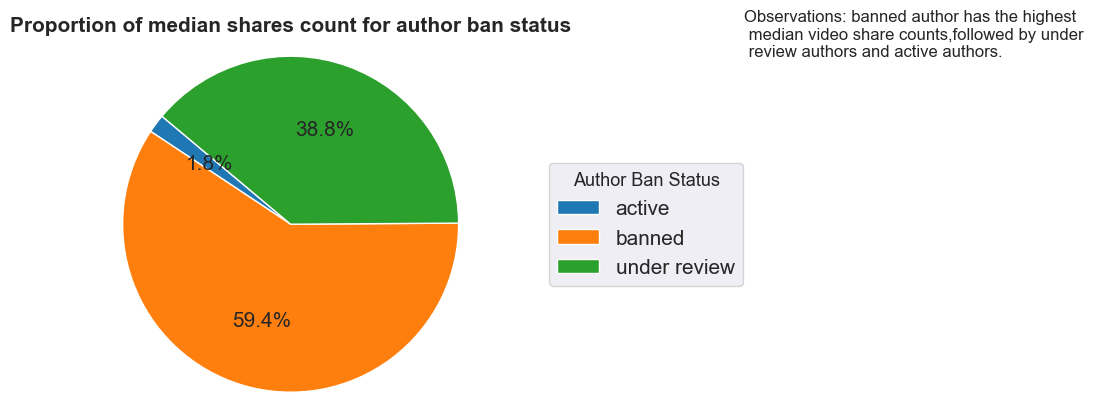

In [20]:
#Visualization for Insight 5

plt.pie(share_pie['video_share_count'], labels= None, autopct = '%1.1f%%', startangle=140, textprops={'fontsize': 15})

plt.title('Proportion of median shares count for author ban status', weight= 'bold', fontsize=15)
plt.legend( share_pie['author_ban_status'], title="Author Ban Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), prop={'size': 15}, title_fontsize='13')
plt.axis('equal')

#Add description text
plt.text(2.7, 1, 'Observations: banned author has the highest\n median video share counts,followed by under\n review authors and active authors.', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

**Insight 6: Comparison of likes per view, comments per view, shares per view for author ban status**

In [21]:
#First I will create 3 new columns 
TikTok_df['like_%'] = TikTok_df['video_like_count']/ TikTok_df['video_view_count']
TikTok_df['share_%'] = TikTok_df['video_share_count']/ TikTok_df['video_view_count']
TikTok_df['comment_%'] = TikTok_df['video_comment_count']/ TikTok_df['video_view_count']

In [22]:
#Group data
prop_ban_bar= TikTok_df.groupby('author_ban_status')[['like_%', 'share_%', 'comment_%']].median()
prop_ban_bar

,like_%,share_%,comment_%
author_ban_status,,,
active,0.254227,0.038429,0.000421
banned,0.325045,0.048507,0.000658
under review,0.290504,0.045357,0.000602


In [23]:
#Reshape the data for visualization
visual5 = prop_ban_bar.stack().reset_index()
visual5

,author_ban_status,level_1,0
0,active,like_%,0.254227
1,active,share_%,0.038429
2,active,comment_%,0.000421
3,banned,like_%,0.325045
4,banned,share_%,0.048507
5,banned,comment_%,0.000658
6,under review,like_%,0.290504
7,under review,share_%,0.045357
8,under review,comment_%,0.000602


Text(2.7, 0.21, 'Observations: Among the author ban status, banned\n and under review authors have higher percentages of\n likes, shares, and comments per view than active authors')

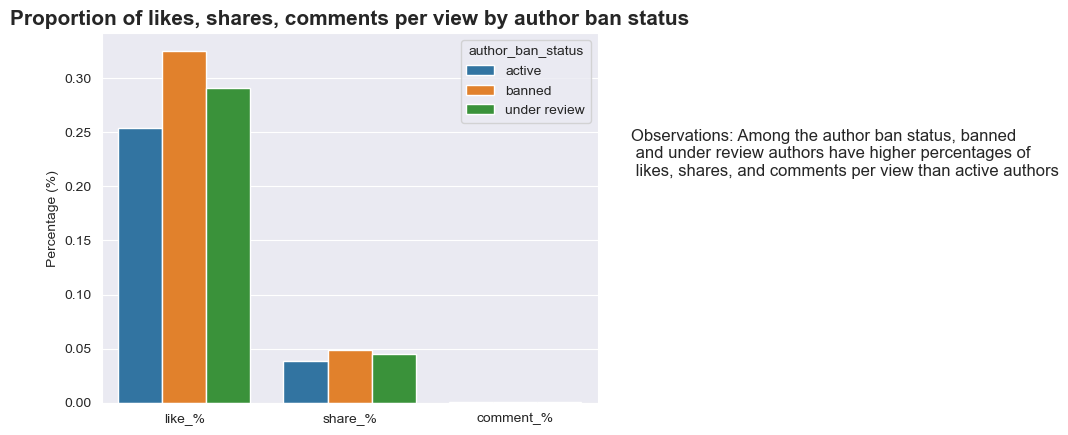

In [24]:
#Visualiztion for insight 6
sns.set_style('darkgrid')
sns.barplot (data= visual5, x= 'level_1', y= 0, hue= 'author_ban_status' )

plt.title('Proportion of likes, shares, comments per view by author ban status', weight= 'bold', fontsize = 15)
plt.xlabel('')
plt.ylabel('Percentage (%)')

#Add description text
plt.text(2.7, 0.21, 'Observations: Among the author ban status, banned\n and under review authors have higher percentages of\n likes, shares, and comments per view than active authors', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))


**Insight 7: Relationship between claim status and verified status**

In [25]:
#Prepare data for visualization 
contingency_table = pd.crosstab(TikTok_df['claim_status'], TikTok_df['verified_status'])
contingency_table

verified_status,not verified,verified
claim_status,,
claim,9399,209
opinion,8485,991


In [26]:
# Reset the index to melt the DataFrame
contingency_table = contingency_table.reset_index()

# Melt the DataFrame to long format
melted_df = contingency_table.melt(id_vars='claim_status', var_name='verified_status', value_name='count')
melted_df

,claim_status,verified_status,count
0,claim,not verified,9399
1,opinion,not verified,8485
2,claim,verified,209
3,opinion,verified,991


Text(1.6, 8200, 'Observation: Most video authors in both \nclaim status category are not verified. \n However, there are less verified authors\n in claim related videos.')

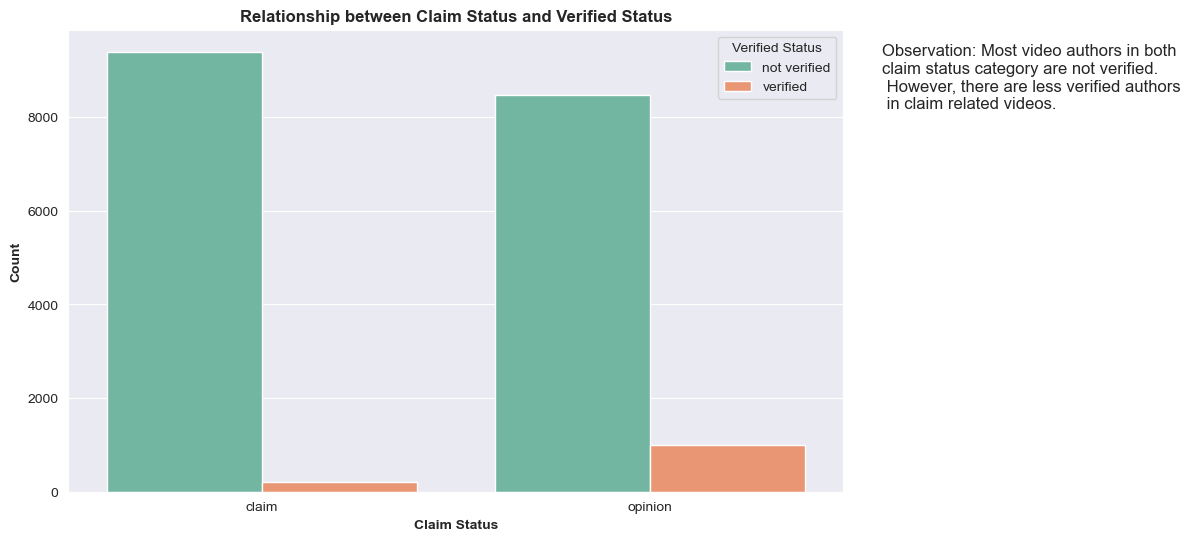

In [27]:
# Plot the grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_df, x='claim_status', y='count', hue='verified_status', palette='Set2')
plt.title('Relationship between Claim Status and Verified Status', weight='bold')
plt.xlabel('Claim Status', weight='bold')
plt.ylabel('Count', weight='bold')
plt.legend(title='Verified Status')

#Add description text
plt.text(1.6, 8200, 'Observation: Most video authors in both \nclaim status category are not verified. \n However, there are less verified authors\n in claim related videos.', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

**Insight 8: Correlation matrix for video engagement metrics**

In [28]:
#Prepare dataframe
corr_df = TikTok_df[[ 'video_view_count', 'video_like_count', 'video_share_count', 'video_comment_count', 'video_download_count']]
corr_df

,video_view_count,video_like_count,video_share_count,video_comment_count,video_download_count
0,343296.0,19425.0,241.0,0.0,1.0
1,140877.0,77355.0,19034.0,684.0,1161.0
2,902185.0,97690.0,2858.0,329.0,833.0
3,437506.0,239954.0,34812.0,584.0,1234.0
4,56167.0,34987.0,4110.0,152.0,547.0
...,...,...,...,...,...
19079,6067.0,423.0,81.0,2.0,8.0
19080,2973.0,820.0,70.0,0.0,3.0
19081,734.0,102.0,7.0,1.0,2.0
19082,3394.0,655.0,123.0,4.0,11.0


In [29]:
#Compute correlation matrix
corr_df.corr(method= 'spearman')

,video_view_count,video_like_count,video_share_count,video_comment_count,video_download_count
video_view_count,1.000000,0.909813,0.863542,0.835336,0.862036
video_like_count,0.909813,1.000000,0.939779,0.899995,0.938575
video_share_count,0.863542,0.939779,1.000000,0.857173,0.889633
video_comment_count,0.835336,0.899995,0.857173,1.000000,0.950944
video_download_count,0.862036,0.938575,0.889633,0.950944,1.000000


Text(-1.5, 7.7, 'Observation: We have some highly correlation between all the metrics.\nIdentify these is crucial for multicollinearity in the predictive model ')

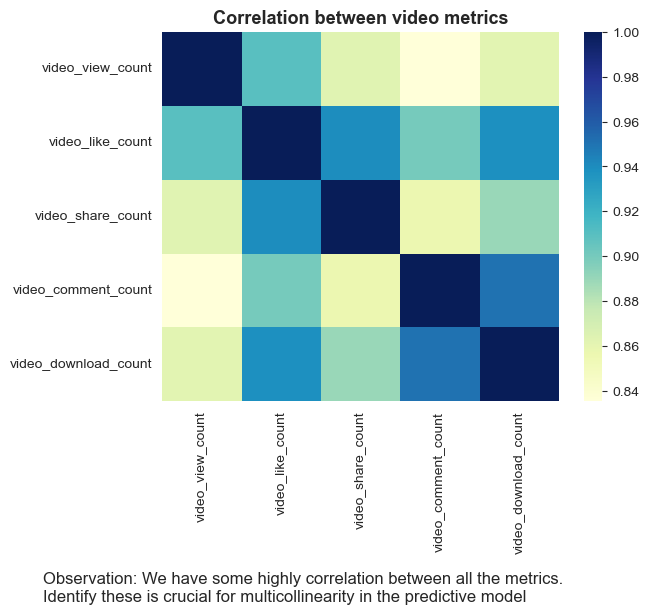

In [30]:
#Heatmap for correlation matrix 
sns.heatmap(data=  corr_df.corr(method= 'spearman'), cmap= 'YlGnBu')

plt.title('Correlation between video metrics', weight= 'bold', fontsize = 13 )
#Add description text
plt.text(-1.5, 7.7, 'Observation: We have some highly correlation between all the metrics.\nIdentify these is crucial for multicollinearity in the predictive model ', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))


In [32]:
#Export Tiktok_df csv to visualize in Tableau
TikTok_df.to_csv(r"C:\Users\LENOVO\OneDrive\Desktop\Data analytics\Portfolio\Full_cycle projects\TikTok classification machine learning\Dataset\tiktok_dataset_enhanced.csv")